# Tratamento de Dados - Planilha de Livros 

A planilha utilizada neste trabalho foi obtida através da plataforma kaggle. 
Link: <https://www.kaggle.com/datasets/asaniczka/amazon-kindle-books-dataset-2023-130k-books>

Importando as bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as sts

Comando para ler o arquivo CSV contendo as tabelas 

In [3]:
df = pd.read_csv('kindle_data.csv')

Verificando, no meu data frame, quais colunas possuo. Poderia ter utilizado o comando *.head()* igualmente.

In [4]:
df.columns

Index(['asin', 'title', 'author', 'soldBy', 'imgUrl', 'productURL', 'stars',
       'reviews', 'price', 'isKindleUnlimited', 'category_id', 'isBestSeller',
       'isEditorsPick', 'isGoodReadsChoice', 'publishedDate', 'category_name'],
      dtype='object')

A fim de melhor manipulação e pensando no que quero responder, removo as colunas que acredito não ter utilizade nesse instante.

In [4]:
df_filtered = df.drop(columns=['asin', 'soldBy', 'imgUrl', 'productURL'])

In [111]:
df_filtered.columns

Index(['title', 'author', 'stars', 'reviews', 'price', 'isKindleUnlimited',
       'category_id', 'isBestSeller', 'isEditorsPick', 'isGoodReadsChoice',
       'publishedDate', 'category_name'],
      dtype='object')

Agora, o dataframe trabalhado será o *df_filtered*, e, apenas para verificar se o comando deu certo, solicitei as colunas novamente e, a seguir, um describe() que me gerará informações gerais para ter uma ideia daquilo que estou trabalhando.

In [135]:
df_filtered.describe()

,stars,reviews,price,category_id
count,133102.000000,133102.000000,133102.000000,133102.000000
mean,4.404090,887.375779,15.134127,16.287111
std,0.745646,5104.878777,22.254986,8.416924
min,0.000000,0.000000,0.000000,1.000000
25%,4.400000,0.000000,4.990000,9.000000
50%,4.500000,4.000000,9.990000,16.000000
75%,4.700000,365.000000,14.990000,23.000000
max,5.000000,618227.000000,682.000000,31.000000


## Avaliando os dados, consigo avaliar o ranking dos autores mais populares baseado no número de publicações e avaliações:

Realizo a criação de um novo dataframe utilizando a função *.groupby()*, agrupando os títulos e avaliações (em estrelas) por autor.

In [125]:
df_ranking_authors = df_filtered.groupby('author').agg({'stars': 'mean', 'title': 'count'}).reset_index().sort_values(['title'])

Assim, possuo um ranking dos autores baseando-se no número de publicações e a média de avaliações (em estrelas, sendo de 0 a 5) que possuem suas publicações.

In [126]:
df_ranking_authors

,author,stars,title
36402,Juliette Powell,4.400000,1
45083,Marilyn Frenn,4.500000,1
45085,Marilyn Hickey,4.800000,1
45086,Marilyn J. Berger,0.000000,1
45088,Marilyn J. Roossinck,4.300000,1
...,...,...,...
22465,Fodor's Travel Guides,4.275652,115
9581,Captivating History,4.259167,120
13934,DK,4.672258,155
13935,DK Eyewitness,4.174847,163


A fim de verificar um "top20", utilizei a função *nlargest()* para selecionar os maiores valores da coluna "título", partindo do princípio que, quanto mais publicações, mais renome na área o artista possui.

In [136]:
top20 = df_ranking_authors.nlargest(20, 'title')

Utilizei função lambda para criar um range de 0 a 20, no ranking dos autores mais populares

In [139]:
top20['ranking'] = x = [x + 1 for x in range(0, 20)]

Adicionei como index o ranking, selecionando os autores a partir de sua colocação (primeiro, segundo, etc.)

In [141]:
top20.set_index('ranking', inplace=True)

In [142]:
top20

,author,stars,title
ranking,,,
1,James Patterson,4.486321,212
2,DK Eyewitness,4.174847,163
3,DK,4.672258,155
4,Captivating History,4.259167,120
5,Fodor's Travel Guides,4.275652,115
6,Erin Hunter,4.785088,114
7,J.K. Rowling,4.743363,113
8,Hourly History,4.256311,103
9,Nora Roberts,4.546465,99


## A avaliação do Kindle Unlimited e seu impacto na venda dos livros partindo do pressuposto que, quanto mais reviews, mais vendas obtiveram.

Para considerar as vendas, avaliei como Reviews, visto que livros mais vendidos possuem maior número de reviews (sejam positivas ou negativas), visto que, se fosse considerar as estrelas de cada livro, existem livros bem avaliados e sem nenhum review do comprador. 

Portanto, utilizei um filtro para dividir em, resumidamente, dois blocos: a presença ou ausência do kindle unlimited.

In [146]:
k_unl = df_filtered['reviews'].loc[df_filtered['isKindleUnlimited'] == True].sum()

In [147]:
k_unl_false = df_filtered['reviews'].loc[df_filtered['isKindleUnlimited'] == False].sum()

Assim, com esses valores, é permitido plotar em um gráfico que, para maior visualização, optei pelo gráfico em pizza:

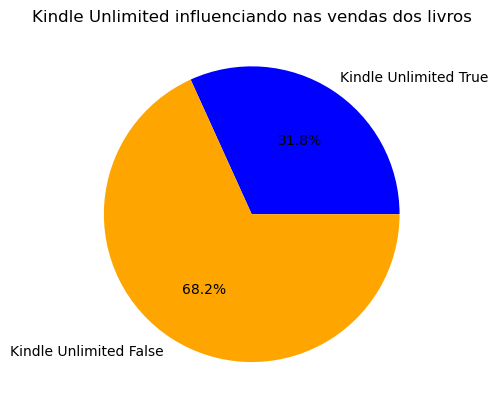

In [148]:
valores = [k_unl, k_unl_false]

# Rótulos das fatias
rotulos = ['Kindle Unlimited True', 'Kindle Unlimited False']

# Cores das fatias
cores = ['blue', 'orange']

# Criando o gráfico de pizza
plt.pie(valores, labels=rotulos, colors=cores, autopct='%1.1f%%')
#autopct foi utilizado para manter a formatação dos valores dentro do gráfico em uma casa após a vírgula

# Adicionando título
plt.title('Kindle Unlimited influenciando nas vendas dos livros')

# Mostrando o gráfico
plt.show()

## Agora, iremos avaliar a influência da opção "Bestseller" e "Editorspick" nas vendas dos livros.

Acredito que, como visto no exemplo acima, as vendas são melhores compreendidas de maneira gráfica. Portanto, como fiz anteriormente, separei em grandes "blocos" para cada uma das opções: *bestseller true* ou *false*, *editorspick true* ou *false*

Conforme utilizei anteriormente os *reviews* para avaliar venda, repetirei o processo. Assim, para cada categoria de True ou False, somei o total de reviews e contei o total de títulos presentes.

In [63]:
best_true = df_filtered.loc[df_filtered['isBestSeller'] == True].agg({'reviews': 'sum', 'title': 'count'})

In [64]:
best_false = df_filtered.loc[df_filtered['isBestSeller'] == False].agg({'reviews': 'sum', 'title': 'count'})

Após a separação desses blocos, para considerar a diferença da quantidade de títulos que pudessem existir ou de reviews em demasia que influenciariam em um livro apenas, resolvi gerar uma constância: a quantidade de reviews, que foi a categoria selecionada para avaliar vendas, por cada título - ou seja, uma proporção de reviews por título.

Assim, para cada bloco de *BestSeller True* ou *BestSeller False*, trabalharia com a proporção da quantidade de reviews dividida pelo número de títulos.

In [66]:
b_true_per_book = best_true[0] / best_true[1]

In [67]:
b_false_per_book = best_false[0] / best_false[1]

Repete-se o mesmo processo feito anteriormente para bestseller:

In [68]:
editors_false = df_filtered.loc[df_filtered['isEditorsPick'] == False].agg({'reviews': 'sum', 'title': 'count'})

In [69]:
editors_true = df_filtered.loc[df_filtered['isEditorsPick'] == True].agg({'reviews': 'sum', 'title': 'count'})

In [70]:
e_false_per_book = editors_false[0] / editors_false[1]

In [71]:
e_true_per_book = editors_true[0] / editors_true[1]

Agora que possuo tanto as proporções de reviews por título de cada uma das categorias, cria-se um gráfico para melhor visualizar a proporção de cada:

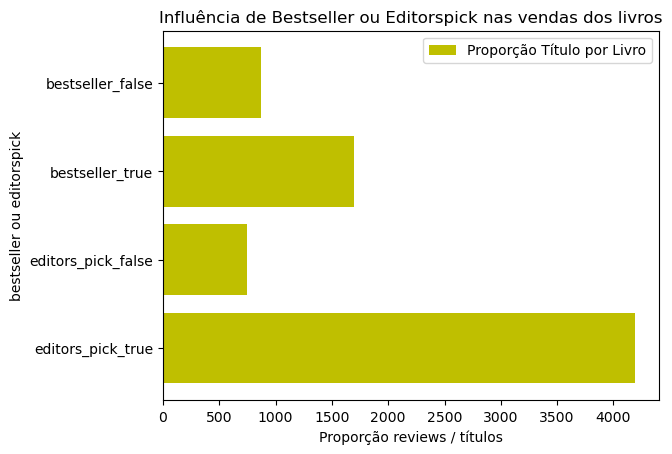

In [149]:
# Dados
categorias = ['editors_pick_true', 'editors_pick_false', 'bestseller_true', 'bestseller_false']
valores = [e_true_per_book, e_false_per_book, b_true_per_book, b_false_per_book]

# Criando o gráfico de barras agrupadas
plt.barh(categorias, valores, label='Proporção Título por Livro', color='y')

# Adicionando título e rótulos aos eixos
plt.title('Influência de Bestseller ou Editorspick nas vendas dos livros')
plt.xlabel('Proporção reviews / títulos')
plt.ylabel('bestseller ou editorspick')

# Adicionando legenda
plt.legend()

# Mostrando o gráfico
plt.show()

De uma maneira mais visual, é perceptível a diferença no número de vendas que ser a *Escolha do Diretor* realiza, bem como é perceptível que a presença do título de *BestSeller* influencia positivamente nas vendas dos livros.

## Agora será realizada uma análise da publicação dos livros com o decorrer do tempo para identificação de alguma sazonalidade.

Para análise, preciso separar os lançamentos de acordo com o ano. Portanto, ocorrerão alteração nas colunas. Assim, para manipular nos dados sem correr o risco de perder os dados originais, copiou-se o dataframe. Será utilizado então o "df_copy".

In [150]:
df_copy = df_filtered.copy()

In [99]:
df_filtered['title'].count()

133102

Realizei este comando apenas para verificar quantos títulos já foram lançados que estão presentes no dataframe. Por se tratar de um valor alto, não é viável separar por data de lançamento. Assim, será organizado em ano de lançamento.

Para tal, utiliza-se a função *to_datetime()* que detecta os valores na coluna *publishedDate* e transforma em data, facilitando a manipulação.

In [151]:
df_copy['publishedDate'] = pd.to_datetime(df_copy['publishedDate'])

Este comando será para selecionar apenas os anos de lançamento de cada livro:

In [153]:
df_copy['published_year'] = df_copy['publishedDate'].dt.year

Nesta linha, utilizei o *groupby* para agrupar por ano de lançamento, contando quantos títulos foram lançados naquele ano e organizando de maneira crescente pelo ANO, desde o primeiro lançamento no ano de 1806 até atualmente, salvando na variável _df_contagem_.

In [154]:
df_contagem = df_copy.groupby(['published_year'])['title'].count().reset_index(name='quantidade').sort_values('published_year', ascending=True)

Apenas para verificar se a contagem está crescente e conforme solicitado, utilizei o comando *.head()* para ver as primeiras cinco linhas.

In [29]:
df_contagem.head()

,published_year,quantidade
0,1806.0,1
1,1900.0,2
2,1928.0,2
3,1929.0,2
4,1930.0,5


Apenas a fim de curiosidade, outro comando para realizar o filtro de livros publicados por ano, com o comando *.size()*

In [155]:
#df_copy.groupby('published_year').size().reset_index(name='quantidade')

,published_year,quantidade
0,1806.0,1
1,1900.0,2
2,1928.0,2
3,1929.0,2
4,1930.0,5
...,...,...
85,2020.0,7408
86,2021.0,8215
87,2022.0,10587
88,2023.0,14537


Agora, para visualizar possível sazonalidade ou algum padrão, irei plotar num gráfico de disperção, onde cada lançamento equivale a um ponto no gráfico:

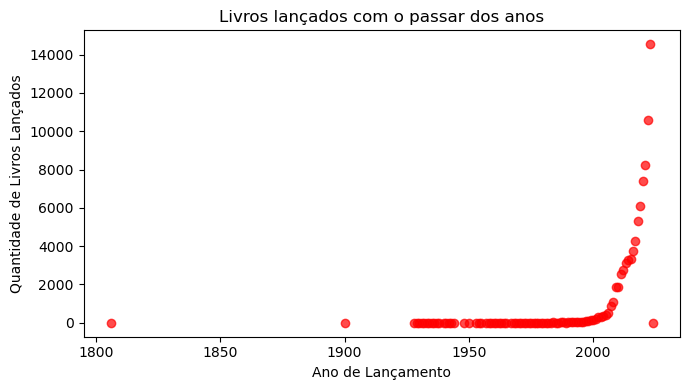

In [37]:
# Criando o gráfico de dispersão
plt.figure(figsize=(7, 4))  # Define o tamanho da figura
plt.scatter(df_contagem['published_year'], df_contagem['quantidade'], marker='o', color='red', alpha=0.7)

# Adicionando título e rótulos aos eixos
plt.title('Livros lançados com o passar dos anos')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Quantidade de Livros Lançados')

# Mostrando o gráfico
plt.tight_layout()  # Ajusta a disposição do gráfico para melhor visualização
plt.show()

Observando o gráfico, percebe-se que, desde 1925, aproximadamente, a quantidade de livros lançados aumentou em frequência de lançamento - porém, a partir dos anos 2000 que houve uma explosão de lançamentos, provavelmente visto a alta demanda. Vale ressaltar que, próximo dos anos 2000, houve um crescente interesse no público "teen", com leituras juvenis, atraindo um grande público infantojuvenil da época para os livros. Harry Potter, Crepúsculo... Soa familiar?

## Por fim, avaliação de gêneros específicos para perceber as respectivas vendas e popularidade

Para visualizarmos os dados que gostaríamos de trabalhar, agrupei por categorias em *um *groupby* e contei a quantidade de livros/títulos existentes por categoria, bem como o ID de cada categoria de forma crescente, totalizando 31 categorias avaliadas.

In [12]:
df_filtered.groupby(['category_id', 'category_name'])['category_name'].count().reset_index(name='books_per_category')

,category_id,category_name,books_per_category
0,1,Arts & Photo graphy,4916
1,2,Comics,478
2,3,Education & Teaching,4986
3,4,History,2045
4,5,Literature & Fiction,4152
5,6,Parenting & Relationships,5901
6,7,Romance,2214
7,8,Sports & Outdoors,3206
8,9,Biographies & Memoirs,5405
9,10,Computers & Technology,5504


Visto que a ID de categoria não interfere na nossa visualização, que, afinal, o mais importante é a categoria e seu nome, retirei a coluna *id_category*. Ao realizar o *groupby()* novamente, para agrupar os títulos por categoria, aproveitei para somar o total de reviews por categoria e a quantidade de títulos, salvando num novo dataframe chamado *df_books*.

In [77]:
df_books = df_filtered[['category_name', 'reviews']].groupby(['category_name']).agg({'category_name' : 'count', 'reviews' : 'sum'})

Apenas a fim de organização, renomeei as colunas para melhor visualização e organizei os valores de forma decrescente considerando o somatório de números de livros lançados por categoria.

In [78]:
df_books = df_books.rename(columns={'category_name' : 'nr_books_per_category', 'reviews' : 'total_reviews'}).sort_values('nr_books_per_category', ascending=False)

In [79]:
df_books

,nr_books_per_category,total_reviews
category_name,,
"Mystery, Thriller & Suspense",6272,34690
Engineering & Transportation,6162,0
Science & Math,5955,0
Parenting & Relationships,5901,228985
Children's eBooks,5747,0
Teen & Young Adult,5738,17238533
Foreign Language,5724,7481625
Travel,5526,2519130
LGBTQ+ eBooks,5517,4778258


Para melhor visualização da quantidade de livros vendidos por categoria, montei um gráfico em barras horizontais: 

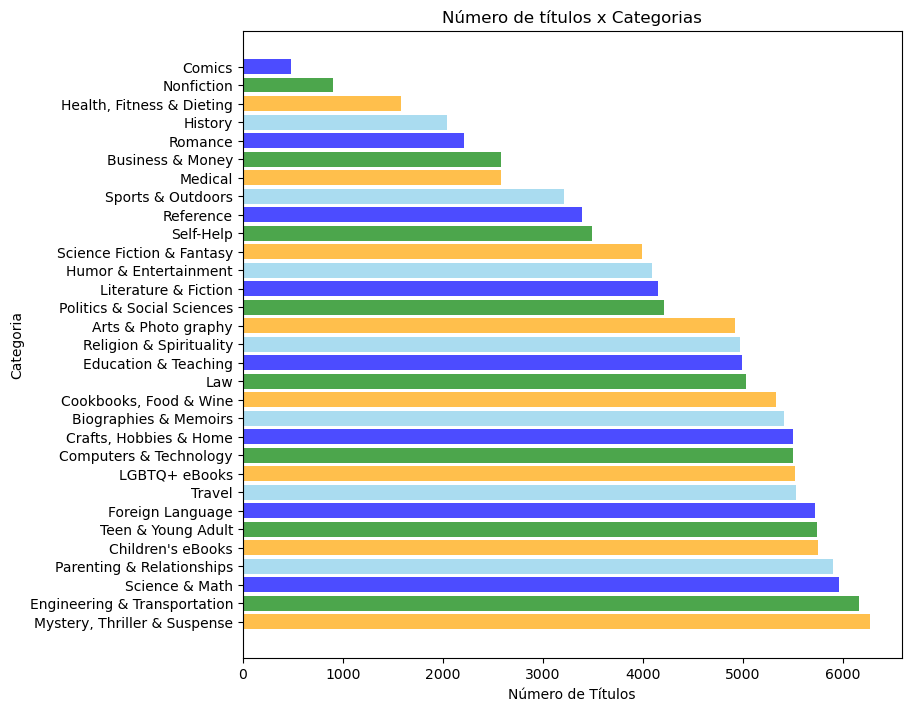

In [164]:
# Dados
categorias = df_books.index
valores = df_books.nr_books_per_category
colors= ['orange', 'green', 'blue', 'skyblue']

# Ajeitando o tamamho do gráfico
plt.figure(figsize=(9, 7), layout='constrained') 

# Criando o gráfico de barras agrupadas
plt.barh(categorias, valores, color=colors, alpha=0.7)

# Adicionando título e rótulos aos eixos
plt.title('Número de títulos x Categorias')
plt.xlabel('Número de Títulos')
plt.ylabel('Categoria')


# Mostrando o gráfico
plt.show()



Avaliando o gráfico, percebe-se que 'Mystery, Thriller & Suspense' está como mais categoria com maior número de publicações, 'Engineering & Transportation' em segundo lugar, 'Science & Math', 'Parenting & Relationships', 'Children's eBooks' em terceiro, quarto e quinto, respectivamente. Assim, é possível avaliar diversas informações, como, por exemplo:
- Livros de comida, por exemplo, não estão no top5 de vendas, porém possuem mais de 50 mil títulos.
- Livros de engenharia, por exemplo, estão num dos mais publicados de todos os disponibilizados.
- Livros de cuidados com crianças, para os pais, são bastante publicados - quase 60 mil títulos. 

Todavia, apenas números de publicações não são considerados, pois podemos ter muitos títulos de um certo conteúdo que não existe procura/demanda, ou, como avaliado neste trabalho, "reviews". Portanto, avalia-se, também, os títulos por seus reviews.

Visto que o número de reviews é muito superior em valor numérico que o número de títulos, os dois, se colocados na mesma tabela, o primeiro acaba interferindo na visualização do outro. Portanto, realizei tabelas separadas.

Como visto na tabela *df_books* publicada acima, existem reviews que o valor é zero. Como é zero, não existe necessidade de barras vazias. Assim, filtrei através do *.iloc* do pandas onde existissem apenas valores não nulos (não-zeros), com a função *.nonzero()* do numpy.

In [165]:
filter_table = df_books.iloc[np.nonzero(df_books.total_reviews)]

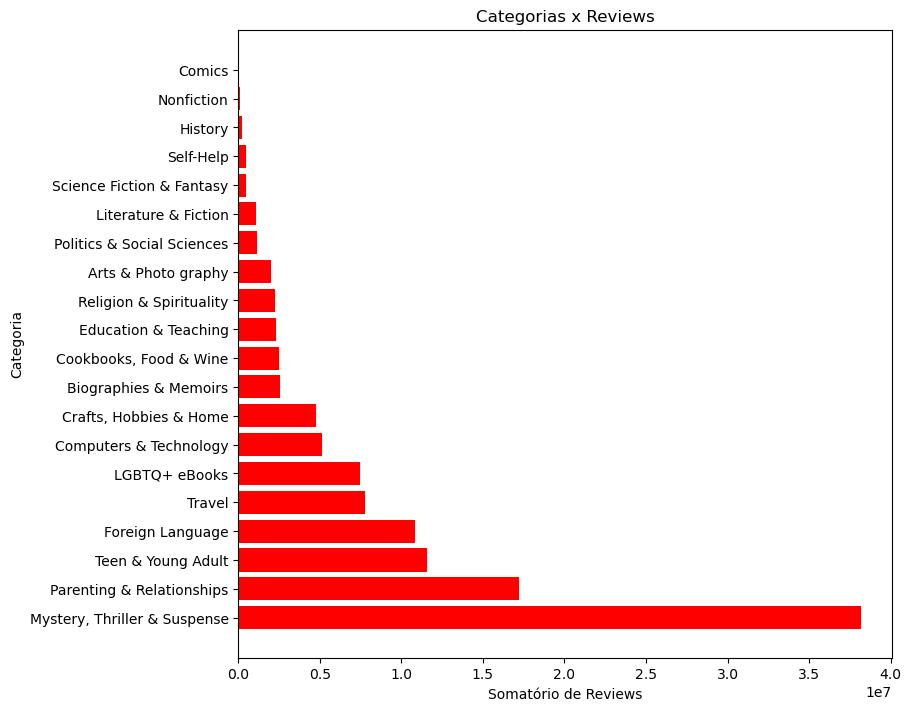

In [123]:
# Dados
categorias = filter_table.index
valores = filter_table.total_reviews.sort_values(ascending=False)

# Ajeitando o tamamho do gráfico
plt.figure(figsize=(9, 7), layout='constrained') 

# Criando o gráfico de barras agrupadas
plt.barh(categorias, valores, color='r')

# Adicionando título e rótulos aos eixos
plt.title('Categorias x Reviews')
plt.xlabel('Somatório de Reviews')
plt.ylabel('Categoria')


# Mostrando o gráfico
plt.show()


Agora, avaliando em reviews:
- Percebe-se que mistério, thriller e suspense continua como mais favorito da categoria, podendo afirmar que esta categoria de livros ocupa o primeiro lugar nas vendas de livro.
- Bem como observado anteriormente, os livros de *parenting* também são altamente avaliados e procurados, que, mesmo sendo um público alvo e nicho específico, possui bastante visualização.
- Combinando as informações, por mais que 'Engineering & Transportation possua grande número de publicações, ele nem sequer apareceu no segundo gráfico de reviews: ou seja, **um largo número de títulos e uma categoria inteira que não possui avaliação sequer**, indicando que não há uma demanda que compense a quantidade de exemplar da categoria.

Isso corrobora com a prática que todo analista deve ter: não olhar apenas valores e números por si só num contexto isolado, pois, conforme mostrado, tudo deve ser avaliado conforme um contexto e uma necessidade, buscando retirar informações que mais condizem com a realidade.

Estes foram apenas alguns exemplos de análises que me dispus a realizar com fim de aprendizado e prática, portanto os dados são muito mais do que números; estes geram informação que nos levam a conclusões, gerando ideias e estimulando a visão analítica. Assim, deixo em aberto para quem quiser obter mais respostas a mais perguntas que devem surgir, e com certeza irão, pois é possível obter um mundo de informações de uma planilha.

Atenciosamente, Ana Luisa.